In [ ]:
import pandas as pd 
diabetic_dataset = pd.read_csv("diabetic_data.csv")
#How many entries are in the data set?
entries_diabetis = diabetic_dataset.shape[0]
entries_diabetis
#How many unknown or missing data are in the data set?
for c in diabetic_dataset:
    print(f"Value counts for column {c}:")
    print(diabetic_dataset[c].value_counts())
    print()
import numpy as np
# Replace ? with NaN in column race
diabetic_dataset['race'] = diabetic_dataset['race'].replace('?', np.nan)
# Replace Unknown/Invalid with NaN in column gender
diabetic_dataset['gender'] = diabetic_dataset['gender'].replace('Unknown/Invalid', np.nan)
# Replace ? with NaN in column weight
diabetic_dataset['weight'] = diabetic_dataset['weight'].replace('?', np.nan)
# Replace ? with NaN in column payer_code
diabetic_dataset['payer_code'] = diabetic_dataset['payer_code'].replace('?', np.nan)
# Replace ? with NaN in column medical_speciality
diabetic_dataset['medical_specialty'] = diabetic_dataset['medical_specialty'].replace('?', np.nan)
diabetic_dataset['diag_1'] = diabetic_dataset['diag_1'].replace('?', np.nan)
diabetic_dataset['diag_2'] = diabetic_dataset['diag_2'].replace('?', np.nan)
diabetic_dataset['diag_3'] = diabetic_dataset['diag_3'].replace('?', np.nan)
diabetic_dataset.head(20)
count = (diabetic_dataset['readmitted'] == '?').sum()

print(count)
null_values_diabetes = diabetic_dataset.isnull().sum()
null_values_diabetes
# count the total number of missing or unknown values in the dataset
total_missing_diabetes = null_values_diabetes.sum()
print("Total number of missing or unknown values in the dataset:", total_missing_diabetes)
readmitted_map = {'NO': 0, '<30': 1, '>30': 1}
diabetic_dataset['readmitted_num'] = diabetic_dataset['readmitted'].map(readmitted_map)
weight_map = {'[75-100)': 0, '[50-75)': 1, '[100-125)': 2,'[125-150)': 3, '[25-50)': 4, '[0-25)': 5,'[150-175)': 6, '[175-200)': 7, '>200': 8}
diabetic_dataset['weight_num'] = diabetic_dataset['weight'].map(weight_map)
diabetic_dataset['weight_num'].corr(diabetic_dataset['readmitted_num'])
race_map = {'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2,'Other': 3, 'Asian': 4}
diabetic_dataset['race_num'] = diabetic_dataset['race'].map(race_map)
diabetic_dataset['race_num'].corr(diabetic_dataset['readmitted_num'])
diabetic_dataset = diabetic_dataset.drop(['encounter_id','patient_nbr','payer_code','medical_specialty','race','weight','readmitted', 'weight_num','race_num','diag_1', 'diag_2', 'diag_3'], axis=1)
null_values_diabetes = diabetic_dataset.isnull().sum()

Value counts for column encounter_id:
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64

Value counts for column patient_nbr:
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

Value counts for column race:
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Value counts for column gender:
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Value counts for column age:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)

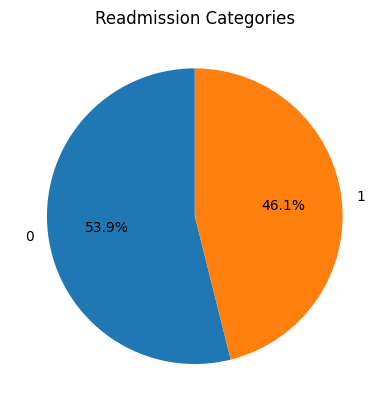

In [ ]:
import matplotlib.pyplot as plt

# Count the number of patients in each category of readmission
readmission_counts = diabetic_dataset['readmitted_num'].value_counts()

# Create a pie chart of the readmission categories
plt.pie(readmission_counts, labels=readmission_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Readmission Categories')

# Display the chart
plt.show()


In [ ]:
diabetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   gender                    101763 non-null  object
 1   age                       101763 non-null  object
 2   admission_type_id         101763 non-null  int64 
 3   discharge_disposition_id  101763 non-null  int64 
 4   admission_source_id       101763 non-null  int64 
 5   time_in_hospital          101763 non-null  int64 
 6   num_lab_procedures        101763 non-null  int64 
 7   num_procedures            101763 non-null  int64 
 8   num_medications           101763 non-null  int64 
 9   number_outpatient         101763 non-null  int64 
 10  number_emergency          101763 non-null  int64 
 11  number_inpatient          101763 non-null  int64 
 12  number_diagnoses          101763 non-null  int64 
 13  max_glu_serum             101763 non-null  object
 14  A1Cr

In [ ]:
diabetic_dataset.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_num
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,2.024017,3.715515,5.754459,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649,0.460894
std,1.445414,5.279919,4.064110,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578,0.498471
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


In [ ]:
diabetic_dataset = diabetic_dataset.dropna()
diabetic_dataset.isnull().sum()

gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-

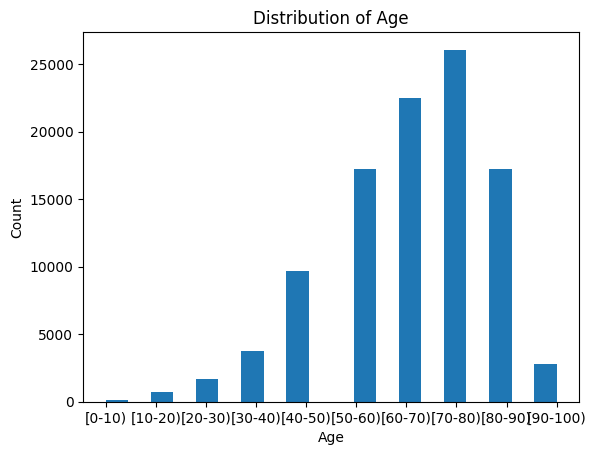

In [ ]:
import matplotlib.pyplot as plt
# create a histogram of the 'age' attribute
plt.hist(diabetic_dataset['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()



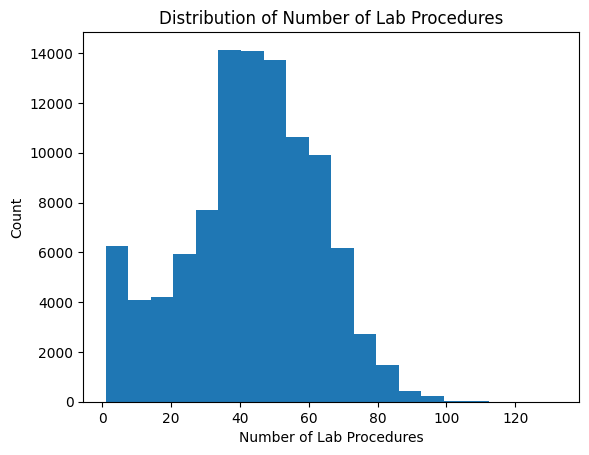

In [ ]:
# create a histogram of the 'num lab procedures' attribute
plt.hist(diabetic_dataset['num_lab_procedures'], bins=20)
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Count')
plt.title('Distribution of Number of Lab Procedures')
plt.show()



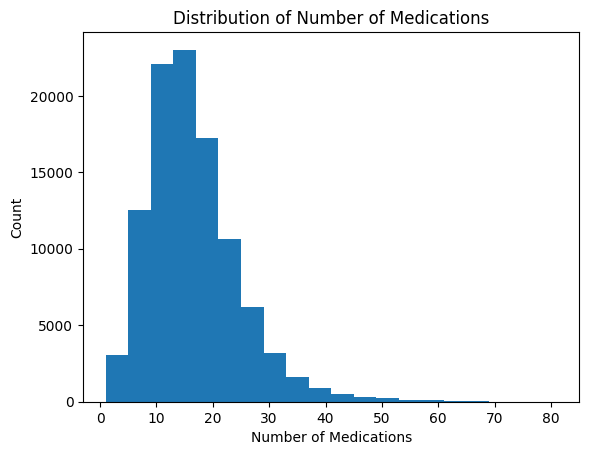

In [ ]:
# create a histogram of the 'num medications' attribute
plt.hist(diabetic_dataset['num_medications'], bins=20)
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Distribution of Number of Medications')
plt.show()

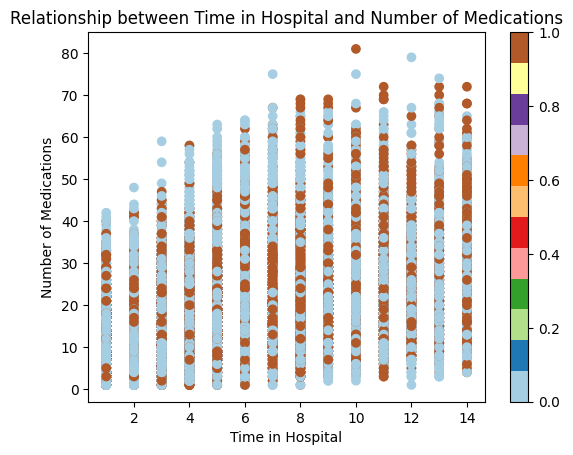

In [ ]:
# create a scatter plot of 'time in hospital' vs 'num medications'
plt.scatter(diabetic_dataset['time_in_hospital'], diabetic_dataset['num_medications'], c=diabetic_dataset['readmitted_num'], cmap='Paired')
plt.xlabel('Time in Hospital')
plt.ylabel('Number of Medications')
plt.title('Relationship between Time in Hospital and Number of Medications')
plt.colorbar()
plt.show()



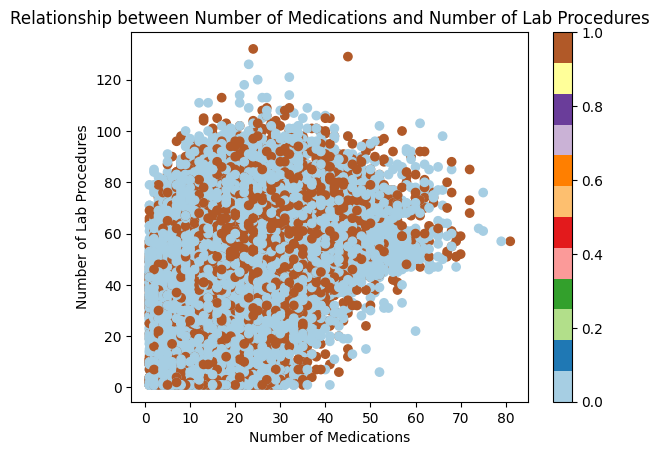

In [ ]:
# create a scatter plot of 'num medications' vs 'num lab procedures'
plt.scatter(diabetic_dataset['num_medications'], diabetic_dataset['num_lab_procedures'], c=diabetic_dataset['readmitted_num'], cmap='Paired')
plt.xlabel('Number of Medications')
plt.ylabel('Number of Lab Procedures')
plt.title('Relationship between Number of Medications and Number of Lab Procedures')
plt.colorbar()
plt.show()

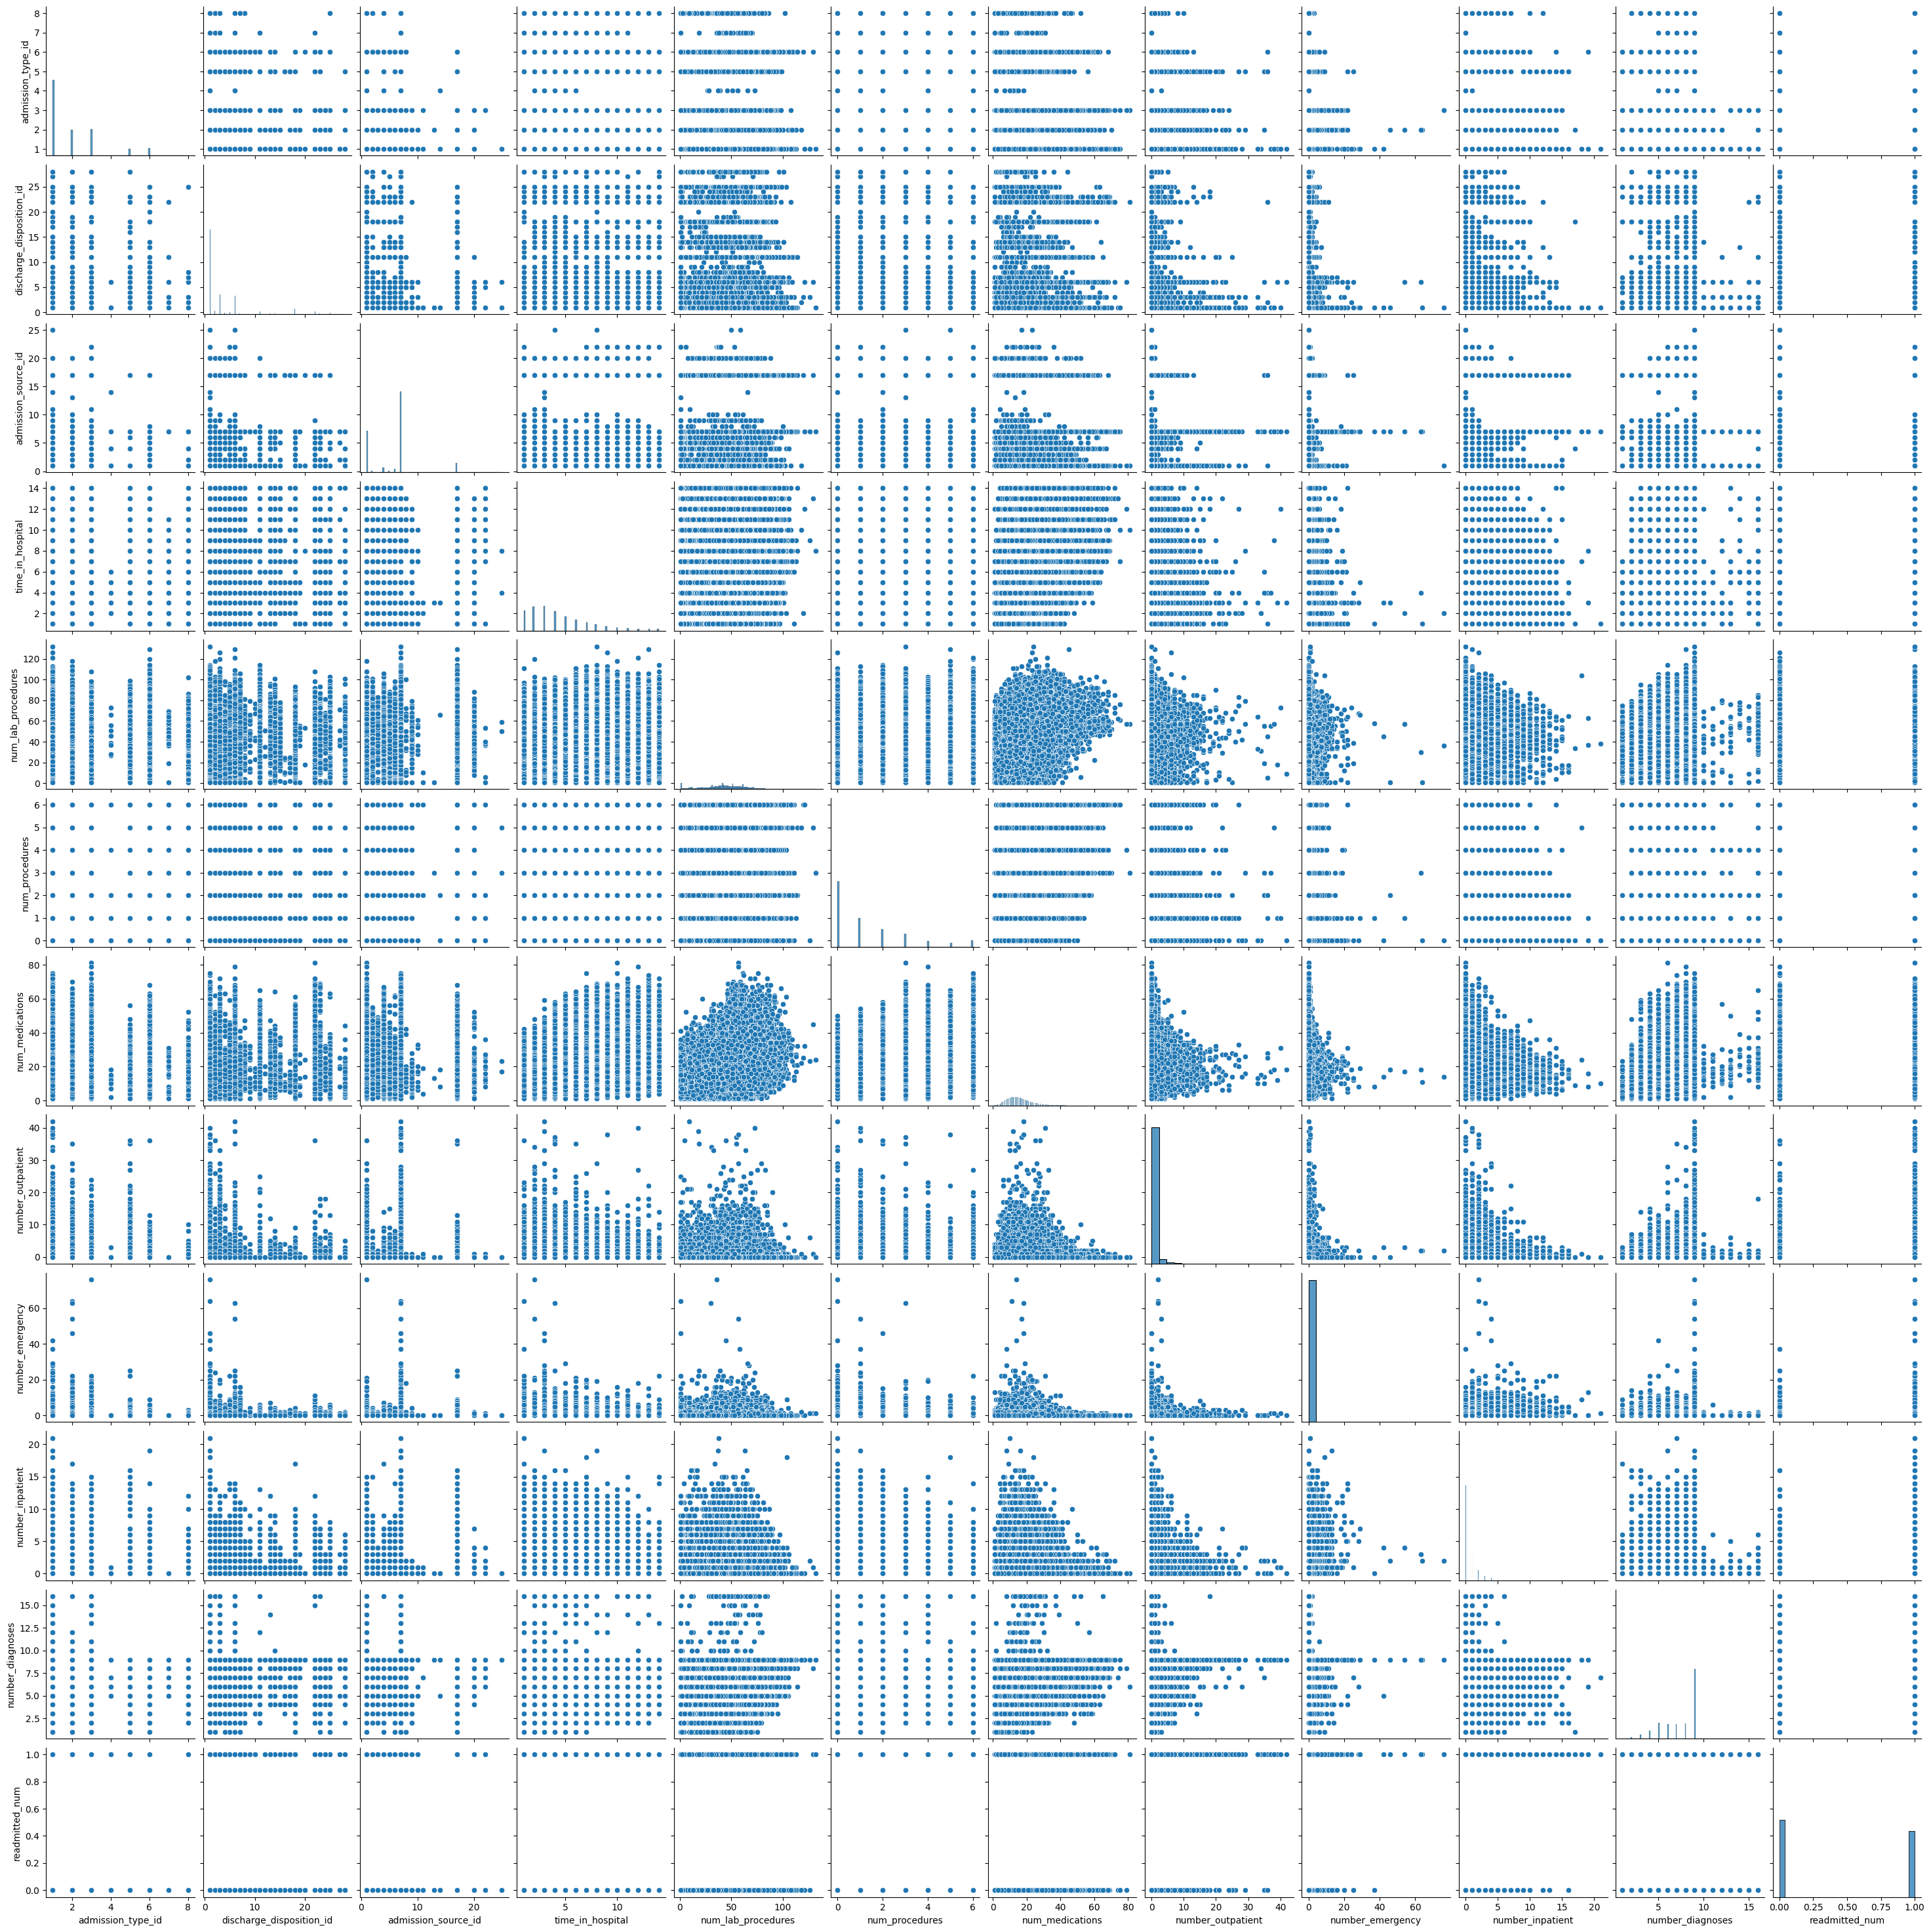

In [ ]:
import seaborn as sns
import pandas as pd

# Create pair plots
sns.pairplot(diabetic_dataset)


<ipython-input-20-73462a4ab1e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diabetic_dataset.corr()


<Axes: >

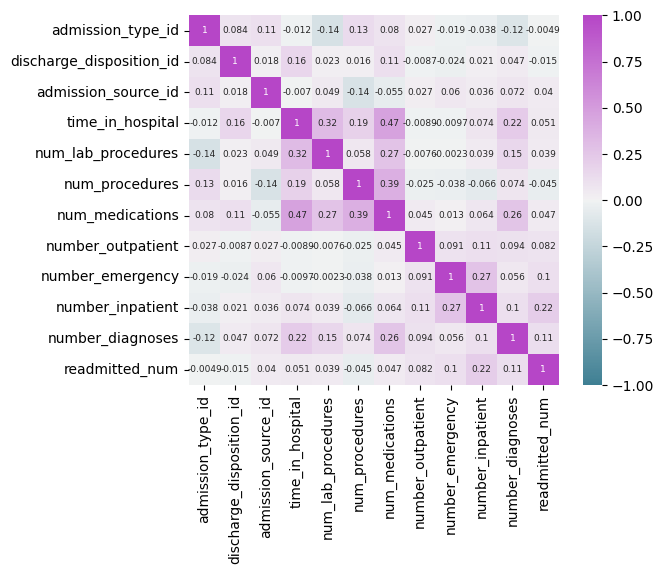

In [ ]:
# Compute the correlation matrix
corr = diabetic_dataset.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap=sns.diverging_palette(220, 300, as_cmap=True), square=True, annot=True, vmin=-1, vmax=1, annot_kws={'fontsize':6.5})


In [ ]:
diabetic_dataset
diabetic_dataset.to_csv(r'diabetic_dataset.csv')